## Author : Indumathi Pandiyan

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">**Project on Sequential NLP** (Module 2) submitted for PGP-AIML Great Learning on 17-July-2022

## Part A - 30 Marks

• **DOMAIN:** : Digital content and entertainment industry

• **CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's 
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build 
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers

• **DATA DESCRIPTION:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). 
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For 
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most 
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word

**PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the 
customer sentiments

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Steps and tasks: [ Total Score: 40 Marks]

## Import the required Libraries

In [1]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
# Import packages
import pandas as pd, numpy as np
import tensorflow as tf


#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Keras
from keras.layers import Dense, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb

from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from itertools import islice


#for word embedding
import gensim
from gensim.models import Word2Vec

In [2]:

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [3]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Import and analyse the data set. [5 Marks] 

### Loading the data set

In [19]:
vocab_size = 10000
## Maximum length for Sentiment Analysis
maxlen_for_SA = 300

### only the num_words most frequent words are kept. Here As per project requirement 10000 most frequent words should be used.

In [27]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

In [28]:
print('X_train shape=',X_train.shape)
print('X_test shape=',X_test.shape)
print('y_train shape=',y_train.shape)
print('y_test shape=',y_test.shape)

X_train shape= (25000,)
X_test shape= (25000,)
y_train shape= (25000,)
y_test shape= (25000,)


In [29]:
len(X_test[0])

68

In [30]:
len(X_test[1])

260

In [31]:
len(X_train[0])

218

#### Based on vocabulary size set the values of unique count changing

In [32]:
len(np.unique(np.hstack(X_train)))

9998

In [33]:
len(np.unique(np.hstack(X_test)))

9951

In [34]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [35]:
len(X_train[0])

218

In [36]:
X_train_max_len = max(len(x) for x in X_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in X_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 2494
Max length of sequence in X_test:  2315


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Perform relevant sequence padding on the data. [5 Marks]

In [37]:
## Maximum length for Sentiment Analysis
maxlen_for_SA = 300

**pad_sequence**:
This function transforms a list (of length num_samples) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). <br>
**num_timesteps** is either the maxlen argument if provided, or the length of the longest sequence in the list.<br>
**Sequences** that are shorter than num_timesteps are padded with value until they are num_timesteps long.<br>
**Sequences** longer than num_timesteps are truncated so that they fit the desired length.<br>
The position where padding or truncation happens is determined by the arguments padding and truncating, respectively. Pre-padding or removing values from the beginning of the sequence is the default<br>

In [39]:
X_train = pad_sequences(X_train, maxlen = maxlen_for_SA, padding = 'pre')
X_test =  pad_sequences(X_test, maxlen = maxlen_for_SA, padding = 'pre')


In [40]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [41]:
len(X_train[0])

300

In [42]:
print('shape of X_train: ',X_train.shape)
print('shape of y_train: ',y_train.shape)
#print(f'Number of columns in training dataset: {x_train.shape[1]}')
#print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')


shape of X_train:  (25000, 300)
shape of y_train:  (25000,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.Perform following data analysis: [5 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.A.Print shape of features and labels

In [45]:
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

In [46]:
X.shape

(50000, 300)

In [47]:
y.shape

(50000,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = random_state, shuffle = True)


In [49]:
print('Train dataset')
print('---'*20)
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('unique words in Train data set',len(np.unique(np.hstack(X_train))))
print('---'*20)

print('Validation dataset')
print('---'*20)
print('X_valid shape',X_valid.shape)
print('y_valid shape', y_valid.shape)
print('unique words in Validation data set',len(np.unique(np.hstack(X_valid))))
print('---'*20)
print('Test dataset')
print('---'*20)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)
print('unique words in Test data set',len(np.unique(np.hstack(X_test))))


Train dataset
------------------------------------------------------------
X_train shape (32000, 300)
y_train shape (32000,)
unique words in Train data set 9999
------------------------------------------------------------
Validation dataset
------------------------------------------------------------
X_valid shape (8000, 300)
y_valid shape (8000,)
unique words in Validation data set 9984
------------------------------------------------------------
Test dataset
------------------------------------------------------------
X_test shape (10000, 300)
y_test shape (10000,)
unique words in Test data set 9995


In [50]:
print(np.unique(y_train))

[0 1]


In [51]:
print(np.unique(y_test))

[0 1]


In [52]:
print(np.unique(y_valid))

[0 1]


**Comments**<br>
The target feature understanding is as follows on Sentiment<br>
 * 0- Negative <br>
 * 1 -positive 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3.B.Print value of any one feature and it's label

In [57]:
len(X_train)

32000

In [70]:
import random
num = random. randint(0,len(X_train))
print(num)

10522


In [71]:
#num=10522

In [72]:
print('Feature of 10th data set',X_train[num])

Feature of 10th data set [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [74]:
print('Label of random data set',y_train[num])

Label of random data set 1


#### The random dataset have value for Positive comments

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Decode the feature value to get original sentence [5 Marks]

#### retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [81]:
imdb_wordindex = imdb.get_word_index()

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [82]:
index_from = 3
imdb_wordindex = {key:value + index_from for key, value in imdb_wordindex.items()}
imdb_wordindex['the']

4

In [106]:
inverted_word = {value: key for key, value in imdb_wordindex.items()}
[inverted_word[index] for index in X_train[num] if index > index_from]

['is',
 'a',
 'typical',
 'tom',
 'and',
 'jerry',
 'short',
 'a',
 'situation',
 'is',
 'designed',
 'conflict',
 'and',
 'mayhem',
 'ensues',
 'the',
 'characters',
 'behave',
 'in',
 'appropriate',
 'ways',
 'the',
 'natural',
 'tensions',
 'between',
 'various',
 'characters',
 'leads',
 'to',
 'general',
 'chaos',
 'the',
 'best',
 'and',
 'funniest',
 'part',
 'is',
 'when',
 'the',
 'peace',
 'is',
 'in',
 'force',
 'and',
 'respected',
 'all',
 'sorts',
 'of',
 'strange',
 'wonders',
 'appear',
 'before',
 'your',
 'eyes',
 'a',
 'word',
 'of',
 'warning',
 'it',
 'is',
 'most',
 'to',
 'allow',
 'tom',
 'to',
 'help',
 'you',
 'perform',
 'your',
 'morning',
 'routine',
 'highly',
 'recommended']

In [115]:
def decode_review(x, y):
  w2i = imdb.get_word_index()                                
  w2i = {k:(v + 3) for k, v in w2i.items()}
  w2i['<PAD'] = 0
  w2i['<START>'] = 1
  w2i['<UNK>'] = 2
  i2w = {i: w for w, i in w2i.items()}

  ws = (' '.join(i2w[i] for i in x))
  print(f'Review: {ws}')
  print(f'Actual Sentiment: {y}')
  return w2i, i2w


In [116]:
w2i, i2w = decode_review(X_train[num], y_train[num])

Review: <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <PAD <P

***Comments** : Original sentence is retrieved by decoding

In [85]:
###Get the sentiment of above sentence

In [86]:
print('Sentiment of Above sentence is',y_train[num])

Sentiment of Above sentence is 1


In [87]:
print('---'*20, f'\nNumber of rows in training dataset: {X_train.shape[0]}')
print(f'Number of columns in training dataset: {X_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(X_train)))}')


------------------------------------------------------------ 
Number of rows in training dataset: 32000
Number of columns in training dataset: 300
Number of unique words in training dataset: 9999


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5.Design, train, tune and test a sequential model. [5 Marks]

In [128]:
vocabulary = 10000
max_words = 300
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten

model = Sequential()
model.add(Embedding(vocabulary, 100, input_length=max_words))
model.add(LSTM(100,return_sequences= True))
dense_layer = Dense(100, activation='relu')
model.add(TimeDistributed(dense_layer))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [130]:
### compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [132]:
### Print model Summary

In [134]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
____________________________________________

### Fit the model

In [136]:
h=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data = (X_valid, y_valid))

Epoch 1/5
500/500 [==============================] - 222s 441ms/step - loss: 0.4083 - accuracy: 0.8133 - val_loss: 0.2646 - val_accuracy: 0.8882
Epoch 2/5
500/500 [==============================] - 222s 444ms/step - loss: 0.1923 - accuracy: 0.9253 - val_loss: 0.2572 - val_accuracy: 0.8975
Epoch 3/5
500/500 [==============================] - 232s 465ms/step - loss: 0.1332 - accuracy: 0.9509 - val_loss: 0.2883 - val_accuracy: 0.8904
Epoch 4/5
500/500 [==============================] - 236s 472ms/step - loss: 0.0879 - accuracy: 0.9680 - val_loss: 0.3878 - val_accuracy: 0.8816
Epoch 5/5
500/500 [==============================] - 232s 464ms/step - loss: 0.0550 - accuracy: 0.9803 - val_loss: 0.4394 - val_accuracy: 0.8832


### Evaulate the model


In [137]:

scores, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 0.4420
Accuracy: 0.8870


In [141]:
plt.style.use('fivethirtyeight')
def plot_accuracy_loss(history):
    accuracy      = history.history['accuracy']
    val_accuracy  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(accuracy)) # Get number of epochs

    plt.plot  ( epochs, accuracy, label = 'training accuracy' )
    plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
    plt.title ('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc = 'lower right')
    plt.figure()

    plt.plot  ( epochs, loss, label = 'training loss' )
    plt.plot  ( epochs, val_loss, label = 'validation loss' )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc = 'upper right')
    plt.title ('Training and validation loss')
    

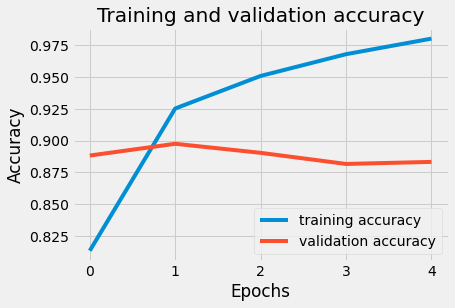

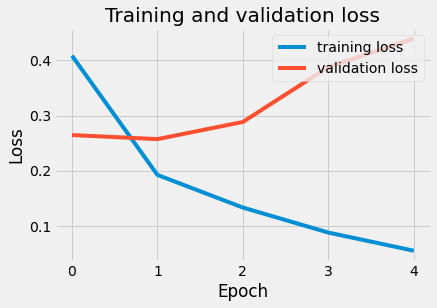

In [142]:
plot_accuracy_loss(h)

In [143]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4942
           1       0.89      0.89      0.89      5058

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [145]:
cm = confusion_matrix(y_test, y_pred)

In [146]:
cm

array([[4362,  550],
       [ 580, 4508]], dtype=int64)

------------------------------------------------------------
Confusion Matrix


,Negative,Positive
Negative,4362,550
Positive,580,4508


------------------------------------------------------------


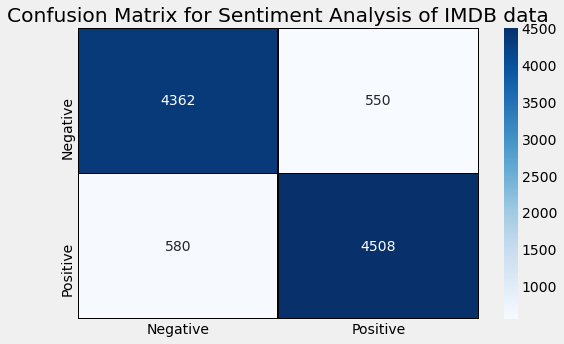

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
print('--'*30); print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm , index = ['Negative', 'Positive'] , columns = ['Negative','Positive'])
display(cm); print('--'*30)

plt.figure(figsize = (8, 5))
_ = sns.heatmap(cm, cmap= 'Blues', linecolor = 'black' , linewidth = 1 , annot = True, 
            fmt = '' , xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive']).set_title('Confusion Matrix for Sentiment Analysis of IMDB data')

Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be 
analytical and experimental here in trying new approaches to design the best model

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6. Use the designed model to print the prediction on any one sample. [5 Marks]

In [154]:
#### Add your code here ####
goodsample = "wonderful movie"
badsample = "can not watch even one time"
from tensorflow.keras.preprocessing.sequence import pad_sequences
for review in [goodsample, badsample]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(imdb_wordindex[word])
    review_padded = pad_sequences([encoded_review], maxlen=300)
    pred = model.predict(review_padded)
    print(pred)
    if pred > 0.5:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review, sentiment))

[[0.84323984]]
Review: wonderful movie
	Sentiment: positive
[[0.25102058]]
Review: can not watch even one time
	Sentiment: negative


**Conclusion**:<br>
    
* In this project able to successfully built a text classification sequential model that analyses Customer sentiments based on their review in the IMDB database.<br>
* The model has 88% accuracy in the Test data. <br>
* The model able to predict positive and negative values successfully after encoding with IMDB data set.<br>
* 4 epochs is executed while fitting the model training accuracy reached near 98.3% accuracy on 4th Epoch. Where as validation accuracy reached 88%.
* loss keeps decreasing in Training data where as it got increased in validation data after 2nd epoch


# PART B


**• DOMAIN:** Social media analytics <br>

**• CONTEXT:** Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based 
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to 
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, 
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs. <br>

**• DATA DESCRIPTION:** <br>

The dataset is collected from two news websites, theonion.com and huffingtonpost.com. 
This new dataset has the following advantages over the existing Twitter datasets:Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This  reduces the sparsity and also increases the chance of finding pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as  compared to Twitter datasets. Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the  real sarcastic elements.
<br>

**Content:** Each record consists of three attributes:<br>
    **is_sarcastic:** 1 if the record is sarcastic otherwise 0 <br>
    **headline:** the headline of the news article <br>
    **article_link:** link to the original news article. Useful in collecting supplementary data
     Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

**PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the 
customer sentiments

In [255]:
from nltk.corpus import stopwords 
import re
import nltk
#from wordcloud import WordCloud
nltk.download("stopwords")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import optuna
import time

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.Read and explore the data [3 Marks]

In [155]:
data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [156]:
data.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


In [157]:
print('data shape',data.shape)

data shape (28619, 3)


In [158]:
data['is_sarcastic'].nunique()

2

In [159]:
data['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [160]:
data.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [161]:
data['article_link'].nunique()

28617

In [162]:
data['headline'].head(1)

0    thirtysomething scientists unveil doomsday clo...
Name: headline, dtype: object

### To get the parent link from the Article Link

In [163]:
from urllib.parse import urlparse
def get_netloc(url):
    scheme, netloc, path, params, query, fragment = urlparse(url)
    return netloc

link = []
for i in range(len(data.article_link)):
    link.append(get_netloc(data.article_link[i]))
    
data["link"] = link

In [164]:
data.head()

,is_sarcastic,headline,article_link,link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,www.theonion.com
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,www.huffingtonpost.com
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,www.huffingtonpost.com
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,local.theonion.com
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,www.theonion.com


In [165]:
rands = random.sample(range(1, data.shape[0]), 5)

### Printing random Headlines and its isSarcastic value

In [166]:
print(rands)

[23717, 4737, 17316, 5291, 16703]


In [167]:
for i in rands:
    #print(i)
    print(data.loc[i,'headline'],'is_sarcastic value is',data.loc[i,'is_sarcastic'])
    #print(''+data.loc[i,'headline']+' is_sarcastic value is'+ data.loc[i,'is_sarcastic'])

people think ivanka trump's new twitter bio is an insult to women is_sarcastic value is 0
kim kardashian's 11 best outfits of 2015 is_sarcastic value is 0
man would rather annoy small group of friends than bunch of strangers at party is_sarcastic value is 1
'it's just a plant, man,' says purdue pharma ceo waving poppy flower before opioid lawsuit judge is_sarcastic value is 1
republicans steel for a loss in trump country special election is_sarcastic value is 0


In [168]:
data['link'].nunique()

9

### Grouping website with Article link

In [170]:
print('Analysis of is_sarcastic Based on the website Name' ); print('--'*30)

hf = data[data['article_link'].str.contains('huffingtonpost.com')].shape[0]
op = data[data['article_link'].str.contains('theonion.com')].shape[0]

is_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 0)].shape[0]

is_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 0)].shape[0]

display(pd.DataFrame([[is_sarcastic_hf, is_sarcastic_op], [not_sarcastic_hf, not_sarcastic_op]], 
                     columns = ['huffingtonpost', 'theonion'], index = ['Sarcastic', 'Non-sarcastic']))

Analysis of is_sarcastic Based on the website Name
------------------------------------------------------------


,huffingtonpost,theonion
Sarcastic,0,13634
Non-sarcastic,14985,1


0    14985
1    13634
Name: is_sarcastic, dtype: int64 



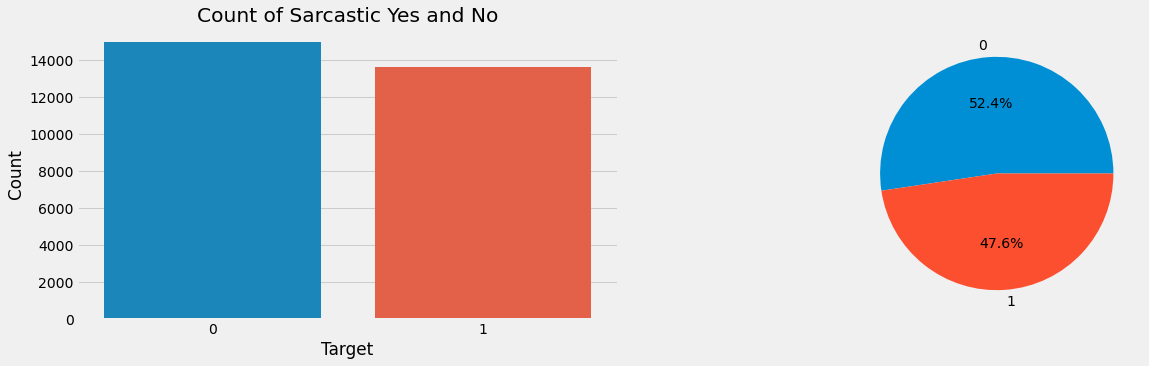

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data.is_sarcastic.value_counts() ,"\n")

fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(data.is_sarcastic, ax = ax[0]);
f1.set_title("Count of Sarcastic Yes and No")
f1.set_ylabel("Count")
f1.set_xlabel("Target")

f2 = plt.pie(data["is_sarcastic"].value_counts().values,explode=[0,0],labels=data.is_sarcastic.value_counts().index, autopct='%1.1f%%')
fig.show()

**Observations**:<br>
    •  There are 28619 records with 3 features. The headlines is independant feature and is_sarcastic is dependent feature.<br>
    •  There are 14985 records(52.4%) isSarcastic 0 and 13634 records(47.6%) as is_Sarcastic is 1 <br>
    •  The data is almost balanced <br>
    •  The the headlines are from two websites "theonion" and "huffingtonpost" . "theonion" has many suburls
    •  From the analysis made above is very clear that all the Sarcastic headlines from "theonion" website and "huffingtonpost" has non sarcastic headlines.
    


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Retain relevant columns [3 Marks]

In [172]:

sarc_data = data[['is_sarcastic', 'headline']].copy()

In [173]:
sarc_data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


**Comments**:<br>
 * The columns requrired for model building is headline is the independent feature and "is_sarcastic" is dependent features. So retaining only those columns

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Get length of each sentence [3 Marks]

In [174]:
sarc_data_temp= sarc_data.copy()

In [175]:
sarc_data["headline"].loc[0]

'thirtysomething scientists unveil doomsday clock of hair loss'

In [176]:
len(sarc_data["headline"].loc[0])

61

In [177]:
sarc_data['length']=sarc_data['headline'].str.len()

In [178]:
sarc_data.head()

,is_sarcastic,headline,length
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61


In [179]:
print("Maximum Length of the sentences from DataFrame = ",sarc_data['length'].max())

Maximum Length of the sentences from DataFrame =  926


In [180]:
sarc_data.loc[sarc_data['length'] == sarc_data['length'].max()]

,is_sarcastic,headline,length
7302,1,hot wheels ranked number one toy for rolling d...,926


### To find the the number of  unique words in the headline

In [181]:
def find_num_words(data):
    wordlist = []
    splitting_list = data.str.split()
    for i in range(len(splitting_list)):
        for j in range(len(splitting_list[i])):
            wordlist.append(splitting_list[i][j])
            
    wordset = set(wordlist)
    
    print("total number of unique words",len(wordset))
    print("total number of words",len(wordlist))
   

In [182]:
find_num_words(sarc_data.headline)

total number of unique words 38234
total number of words 287620


### Steps to cleanup the Headlines

In [183]:
#library that contains punctuation
import string
string.punctuation
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output=  ' '.join([word for word in text.split() if word not in stopwords])
    return output

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Remove html tags
def removeHTML(text):
    regex = re.compile('<.*?>')
    return re.sub(regex, ' ', text)

# Remove URLs
def removeURL(text):
    regex = re.compile('http[s]?://\S+')
    return re.sub(regex, ' ', text)

# remove numbers, punctuation and any special characters (keep only alphabets)
def onlyAlphabets(text):
    regex = re.compile('[^a-zA-Z]')
    return re.sub(regex, ' ', text)


In [184]:
def lemmetize(text):
     # Create an empty list containing lemmatized words
    lemmatized_list = []
    text_words = text.split(" ")
    
    #print(text_words)
    
    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    #print(lemmatized_list)
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    #print(lemmatized_text)
    return lemmatized_text

In [185]:

def removeSpaces(text):
    # Strip unwanted spaces
    return text.strip()

In [187]:
sarc_data['headline'].values[100]

'report: 70% of trump endorsements made after staring at bedroom ceiling for 4 hours'

In [188]:
x=7302

In [189]:
tmp_sentence=lemmetize(sarc_data['headline'].values[x])

In [190]:
tmp_sentence

'hot wheel rank number one toy for roll down ramp, knock over dominoes that send marble down a funnel, drop onto teeter-totter that yank on string, cause pulley system to raise wooden block, propel series of twine rollers that unwind spring, launch tennis ball across room, inch tire down slope until it hit power switch, activate table fan that blow toy ship with nail attach to it across kiddie pool, pop water balloon that fill cup, weigh down lever that force basketball down track, nudge broomstick on axis to rotate, allow golf ball to roll into sideways coffee mug, which tumble down row of hardcover book until handle catch hook attach to lever that cause wooden mallet to slam down on serve spoon, catapult small ball into cup attach by ribbon to lazy susan, which spin until it push d battery down incline plane, tip over salt shaker to season omelet'

In [191]:
headline = sarc_data['headline'].values[x]
sarcasm = sarc_data['is_sarcastic'].values[x]

print("before ",headline)
cleaned_sentence = []
   
# Remove URL
sentence = removeURL(headline) 
    
# Remove HTML
sentence = removeHTML(sentence)
    
# Get only alphabets
sentence = onlyAlphabets(sentence)
    
#Convert to lower case
sentence = sentence.lower()
    
#Remove punctuation
sentence=remove_punctuation(sentence)

#Remove stop words
sentence= remove_stopwords(sentence)
    
#Remove spaces
sentence=removeSpaces(sentence)
   
    
#Lemmetize
sentence=lemmetize(sentence)

print("after ", sentence)
           

before  hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet
after  hot wheel rank number one toy roll ramp knock dominoes sen

In [192]:
sno = nltk.stem.SnowballStemmer('english')    # Initializing stemmer
wordcloud = [[], []]
all_sentences = []    # All cleaned sentences


for x in range(len(sarc_data['headline'].values)):
    headline = sarc_data['headline'].values[x]
    sarcasm = sarc_data['is_sarcastic'].values[x]

    #print("before ",headline)
    cleaned_sentence = []
   
    # Remove URL
    sentence = removeURL(headline) 
    
    # Remove HTML
    sentence = removeHTML(sentence)
    
    # Get only alphabets
    sentence = onlyAlphabets(sentence)
    
    #Convert to lower case
    sentence = sentence.lower()
    
    #Remove punctuation
    sentence=remove_punctuation(sentence)

    #Remove stop words
    sentence= remove_stopwords(sentence)
    
    #Remove spaces
    sentence=removeSpaces(sentence)
       
    #Lemmetize
    sentence=lemmetize(sentence)          

    all_sentences.append(''.join(sentence))

In [193]:
len(all_sentences)

28619

In [194]:
all_sentences[x]

'dad clarify food stop'

In [195]:
sarc_data['final_headline'] = all_sentences

### WordCloud of Headline that is not Sarcastic

In [198]:
from wordcloud import WordCloud

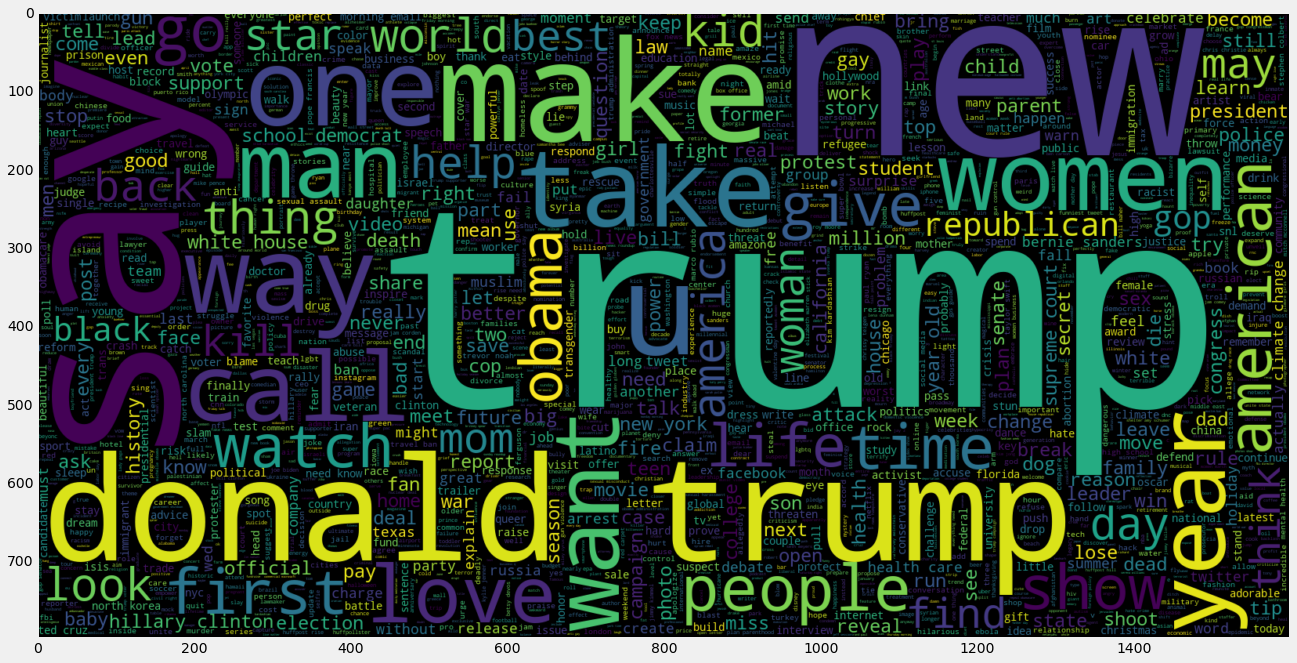

In [201]:
plt.figure(figsize = (20,20))
plt.grid(False)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sarc_data[sarc_data.is_sarcastic == 0].final_headline))
plt.imshow(wc , interpolation = 'bilinear')

### WordCloud of Headline that is  Sarcastic

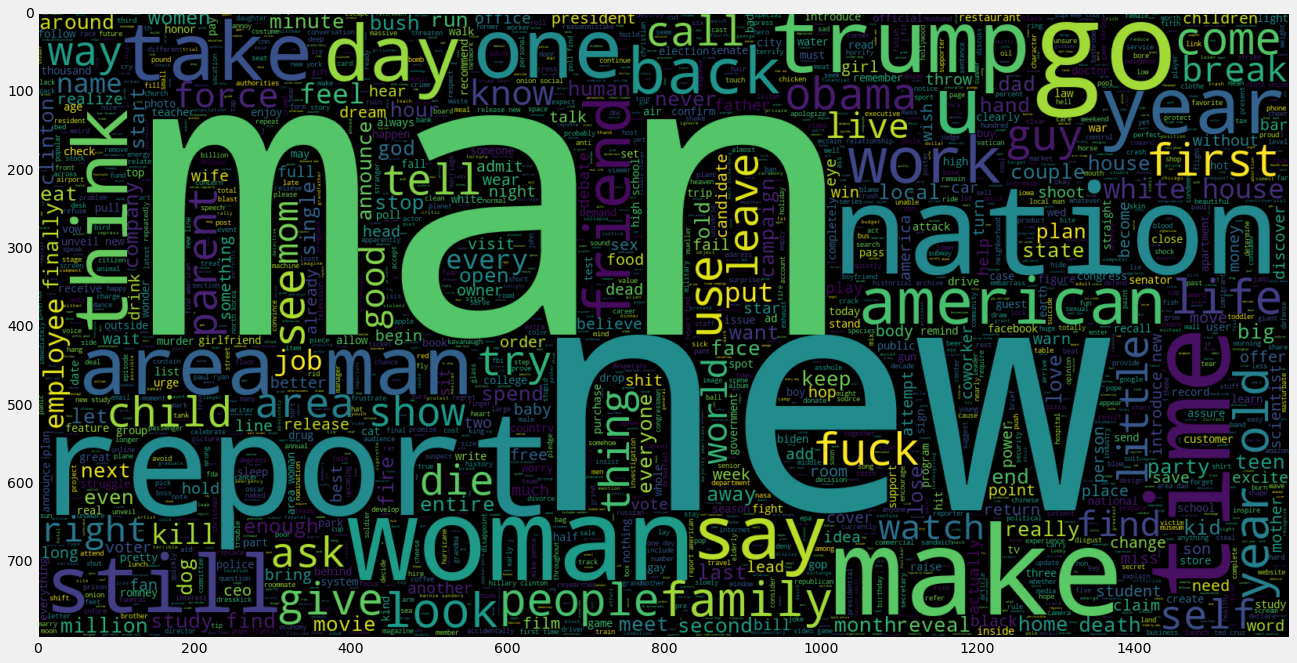

In [202]:
plt.figure(figsize = (20,20))
plt.grid(False)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sarc_data[sarc_data.is_sarcastic == 1].final_headline))
plt.imshow(wc , interpolation = 'bilinear')

In [203]:
sarc_data.head()

,is_sarcastic,headline,length,final_headline
0,1,thirtysomething scientists unveil doomsday clo...,61,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,79,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,49,eat veggies deliciously different recipes
3,1,inclement weather prevents liar from getting t...,52,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,61,mother come pretty close use word stream corre...


In [204]:
sarc_data.tail()

,is_sarcastic,headline,length,final_headline
28614,1,jews to celebrate rosh hashasha or something,44,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,87,internal affairs investigator disappoint consp...
28616,0,the most beautiful acceptance speech this week...,71,beautiful acceptance speech week come queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,mar probe destroy orbit spielberg gate space p...
28618,1,dad clarifies this not a food stop,34,dad clarify food stop


In [205]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
#print('Number of words ranges from 2 to 39.'); print('--'*40)
# Get length of each line
sarc_data['nb_words'] = sarc_data['final_headline'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(sarc_data['nb_words'].min()))
print('Maximum number of words: {}'.format(sarc_data['nb_words'].max()))
print('Line with maximum number of words: {}'.format(sarc_data[sarc_data['nb_words'] == sarc_data['nb_words'].max()]['final_headline'].values[0]))

--------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Minimum number of words: 1
Maximum number of words: 107
Line with maximum number of words: hot wheel rank number one toy roll ramp knock dominoes send marble funnel drop onto teeter totter yank string cause pulley system raise wooden block propel series twine rollers unwind spring launch tennis ball across room inch tire slope hit power switch activate table fan blow toy ship nail attach across kiddie pool pop water balloon fill cup weigh lever force basketball track nudge broomstick axis rotate allow golf ball roll sideways coffee mug tumble row hardcover book handle catch hook attach lever cause wooden mallet slam serve spoon catapult small ball cup attach ribbon lazy susan spin push battery incline plane tip salt shaker season omelet


In [206]:
sarc_data.head()

,is_sarcastic,headline,length,final_headline,nb_words
0,1,thirtysomething scientists unveil doomsday clo...,61,thirtysomething scientists unveil doomsday clo...,7
1,0,dem rep. totally nails why congress is falling...,79,dem rep totally nail congress fall short gende...,10
2,0,eat your veggies: 9 deliciously different recipes,49,eat veggies deliciously different recipes,5
3,1,inclement weather prevents liar from getting t...,52,inclement weather prevent liar get work,6
4,1,mother comes pretty close to using word 'strea...,61,mother come pretty close use word stream corre...,8


In [207]:
sarc_data.loc[sarc_data['nb_words'] == sarc_data['nb_words'].max()]

,is_sarcastic,headline,length,final_headline,nb_words
7302,1,hot wheels ranked number one toy for rolling d...,926,hot wheel rank number one toy roll ramp knock ...,107


**Comments**<br>

The data at index 7302 has maximum number of words 107 and the same have been printed above

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Define parameters [3 Marks]

In [208]:
max_features = 10000
maxlen = sarc_data['nb_words'].max()
embedding_size = 200

In [209]:
maxlen

107

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5. Get indices for words [3 Marks]

### Apply Tokenizer for the final headline

In [213]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(sarc_data['final_headline']))

In [214]:
print("The word index",tokenizer.word_index)

The word index {'trump': 1, 'new': 2, 'man': 3, 'get': 4, 'make': 5, 'say': 6, 'report': 7, 'time': 8, 'go': 9, 'one': 10, 'year': 11, 'woman': 12, 'find': 13, 'day': 14, 'take': 15, 'u': 16, 'area': 17, 'like': 18, 'donald': 19, 'first': 20, 'people': 21, 'obama': 22, 'old': 23, 'house': 24, 'women': 25, 'show': 26, 'nation': 27, 'life': 28, 'back': 29, 'world': 30, 'call': 31, 'white': 32, 'look': 33, 'give': 34, 'know': 35, 'still': 36, 'want': 37, 'think': 38, 'work': 39, 'clinton': 40, 'watch': 41, 'plan': 42, 'come': 43, 'state': 44, 'live': 45, 'school': 46, 'use': 47, 'right': 48, 'could': 49, 'family': 50, 'tell': 51, 'love': 52, 'need': 53, 'see': 54, 'way': 55, 'americans': 56, 'kill': 57, 'black': 58, 'change': 59, 'study': 60, 'star': 61, 'would': 62, 'parent': 63, 'gop': 64, 'bill': 65, 'kid': 66, 'american': 67, 'shoot': 68, 'years': 69, 'leave': 70, 'last': 71, 'president': 72, 'talk': 73, 'home': 74, 'really': 75, 'best': 76, 'try': 77, 'help': 78, 'police': 79, 'ameri

In [215]:
print("The count of words",tokenizer.word_counts)

The count of words OrderedDict([('thirtysomething', 1), ('scientists', 103), ('unveil', 126), ('doomsday', 5), ('clock', 21), ('hair', 62), ('loss', 39), ('dem', 4), ('rep', 27), ('totally', 55), ('nail', 30), ('congress', 141), ('fall', 122), ('short', 46), ('gender', 31), ('racial', 22), ('equality', 25), ('eat', 171), ('veggies', 2), ('deliciously', 1), ('different', 64), ('recipes', 30), ('inclement', 2), ('weather', 34), ('prevent', 54), ('liar', 8), ('get', 1012), ('work', 347), ('mother', 147), ('come', 339), ('pretty', 119), ('close', 80), ('use', 321), ('word', 132), ('stream', 21), ('correctly', 5), ('white', 388), ('inheritance', 3), ('ways', 127), ('file', 31), ('tax', 116), ('less', 70), ('stress', 52), ('richard', 24), ('branson', 1), ('global', 53), ('warm', 24), ('donation', 13), ('nearly', 39), ('much', 150), ('cost', 58), ('fail', 128), ('balloon', 13), ('trip', 75), ('shadow', 18), ('government', 126), ('large', 27), ('meet', 238), ('marriott', 1), ('conference', 28)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6.Create features and labels [3 Marks]

In [216]:
X = tokenizer.texts_to_sequences(sarc_data['final_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(sarc_data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

Number of Samples: 28619
Number of Labels: 28619

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  325  250 5221 1881  619 1074]

Label of the first headline: 1


**Comments:**<br>
The final headline is the feature and labels are the is_sarcastic feature

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">7.Get vocabulary size [3 Marks]

In [218]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')

Number of unique tokens: 20922


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">8.Create a weight matrix using GloVe embeddings [3 Marks]

In [219]:
import os
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors #

In [220]:
path=os.getcwd()+"//"

#glove_file = datapath(path + 'glove.6B.50d.txt') # This is a GloVe model
EMBEDDING_FILE = datapath(path + 'glove.6B.200d.txt')

embeddings = {}
#for o in open(EMBEDDING_FILE,errors="ignore"):
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [221]:
len(embeddings)

400000

### Matrix for word Embedding

In [225]:
# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">9. Define and compile a Bidirectional LSTM model. [3 Marks]

In [222]:
from tensorflow.keras.initializers import Constant

In [223]:
# Models
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential


**Bi-Directional Long Short Term Memory**
Bidirectional long-short term memory (Bi-LSTM) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward (past to future).

In bidirectional, our input flows in two directions, making a Bi-LSTM different from the regular LSTM. With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bidirectional, we can make the input flow in both directions to preserve the future and the past information. For a better explanation, let’s have an example.

In the sentence "boys go to…" we can not fill the blank space. Still, when we have a future sentence “boys come out of school”, we can easily predict the past blank space the similar thing we want to perform by our model and bidirectional LSTM allows the neural network to perform this.


In [226]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 107, 200)          2000200   
                                                                 
 bidirectional (Bidirectiona  (None, 107, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [227]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

------------------------------------------------------------ 
Number of rows in training dataset: 22895
Number of columns in training dataset: 107
Number of unique words in training dataset: 9936
------------------------------------------------------------ 
Number of rows in test dataset: 5724
Number of columns in test dataset: 107
Number of unique words in test dataset: 7185


In [228]:
batch_size = 100
epochs = 10

h = model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2, callbacks = callbacks)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.53797, saving model to sarcasm_detector.h5
184/184 - 95s - loss: 0.6299 - accuracy: 0.6368 - val_loss: 0.5380 - val_accuracy: 0.7366 - lr: 0.0010 - 95s/epoch - 514ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.53797 to 0.49839, saving model to sarcasm_detector.h5
184/184 - 99s - loss: 0.5326 - accuracy: 0.7359 - val_loss: 0.4984 - val_accuracy: 0.7580 - lr: 0.0010 - 99s/epoch - 537ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.49839 to 0.46222, saving model to sarcasm_detector.h5
184/184 - 99s - loss: 0.4725 - accuracy: 0.7779 - val_loss: 0.4622 - val_accuracy: 0.7849 - lr: 0.0010 - 99s/epoch - 539ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.46222 to 0.44600, saving model to sarcasm_detector.h5
184/184 - 100s - loss: 0.4336 - accuracy: 0.8004 - val_loss: 0.4460 - val_accuracy: 0.7893 - lr: 0.0010 - 100s/epoch - 546ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.44600 to 0.43728, saving model to sarcasm_de

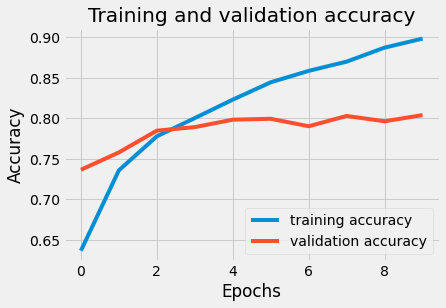

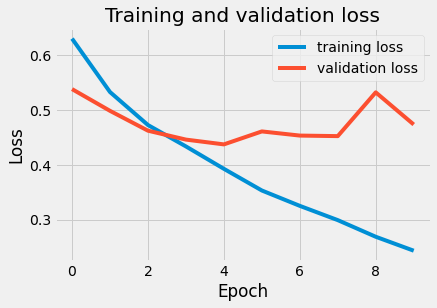

In [229]:
plot_accuracy_loss(h)

In [231]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))

Overall Accuracy: 81.0


In [232]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3232
           1       0.76      0.83      0.79      2492

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



------------------------------------------------------------
Confusion Matrix


,Non-sarcastic,Sarcastic
Non-sarcastic,2564,431
Sarcastic,668,2061


------------------------------------------------------------


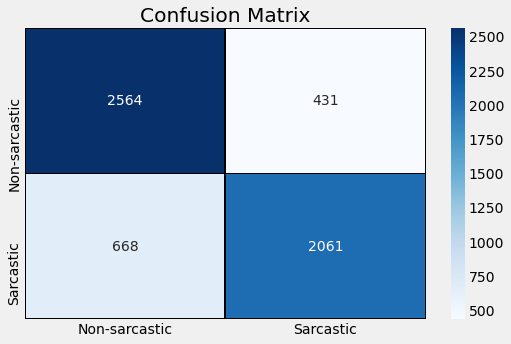

In [233]:
print('--'*30); print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm , index = ['Non-sarcastic', 'Sarcastic'] , columns = ['Non-sarcastic','Sarcastic'])
display(cm); print('--'*30)

plt.figure(figsize = (8, 5))
_ = sns.heatmap(cm, cmap= 'Blues', linecolor = 'black' , linewidth = 1 , annot = True, 
            fmt = '' , xticklabels = ['Non-sarcastic', 'Sarcastic'], 
            yticklabels = ['Non-sarcastic', 'Sarcastic']).set_title('Confusion Matrix')

**Conclusion**:<br>
* The sarcasm and non-sarcastic headlines given by two of the popular website is analysed. The headlines data are preprocessed for model building.<br>
* Global vector is used for vectorization of the words. The Bidirection LTSM is used to build the model and model is able to predict with 81.0% accuracy of the testdata.
 * Model able to detect Sarcastic and Non-sarcastic messages with 81% accuracy
 * While fitting the model, it run for 10 epoch, as epochs increases, training accuracy constantly increased, where as validation accuracy become constant for 6 epochs.
 * Similarly loss also decreases constantly in training data but test data it started increasing after 6 epochs
